# John D. Cook's chaos game

John D. Cook [proposed](https://www.johndcook.com/blog/2017/07/08/the-chaos-game-and-the-sierpinski-triangle/) an interesting "game": start at a vertex of an equilateral triangle. Then move to a new point halfway between the current point and one of the three vertexes, chosen at random. Repeat to create *N* points, and plot them. What do you get? 

I'll refactor Cook's code a bit and then we'll see:

In [1]:
import matplotlib.pyplot as plt
import random

triangle = ((0, 0), (0.5, (3**0.5)/2), (1, 0))

def random_points(vertexes=triangle, N=4000):
    "Create N points by repeatedly moving halfway towards a random vertex."
    points = [random.choice(vertexes)]
    for i in range(N-1):
        points.append(midpoint(points[-1], random.choice(vertexes)))
    return points

def midpoint(p, q): return ((p[0] + q[0])/2, (p[1] + q[1])/2)

def transpose(matrix): return zip(*matrix)

def show(points):
    "Display points in a scatter plot."
    X, Y = transpose(points)
    plt.scatter(X, Y, marker='.', color='r')
    plt.gca().set_aspect('equal')
    plt.axis('off')
    plt.show()

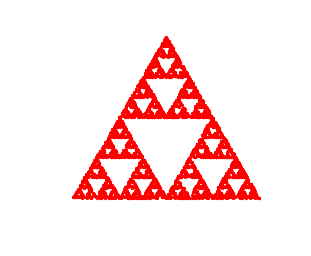

In [2]:
show(random_points())

Wow! The [Sierpinski Triangle](https://en.wikipedia.org/wiki/Sierpinski_triangle) (more or less). 

What happens if we start with a different set of vertexes, like a square:

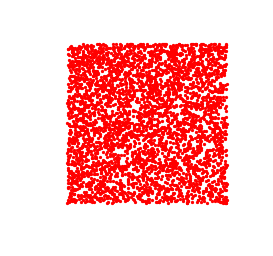

In [3]:
square = ((0, 0), (0, 1), (1, 0), (1, 1))

show(random_points(square))

There doesn't seem to be any structure there. Let's try again and compare the two:

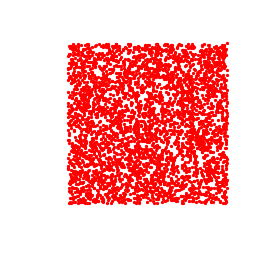

In [4]:
show(random_points(square))

I'm still not seeing anything but random points. How about a right triangle?

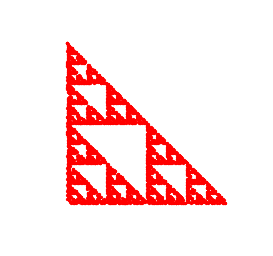

In [5]:
right_triangle = ((0, 0), (0, 1), (1, 0))

show(random_points(right_triangle))

We get a squished Serpinski triangle. How about a pentagon? (I'm lazy so I had Wolfram Alpha [compute the vertexes](https://www.wolframalpha.com/input/?i=vertexes+of+regular+pentagon).)

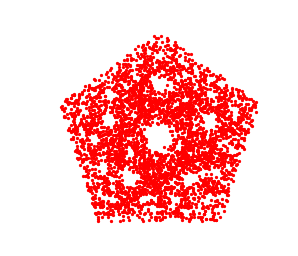

In [6]:
pentagon = ((0.5, -0.688), (0.809, 0.262), (0., 0.850), (-0.809, 0.262), (-0.5, -0.688))

show(random_points(pentagon))

To clarify, let's try again, and with a different number of points:

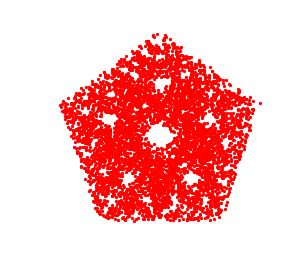

In [7]:
show(random_points(pentagon, 6000))

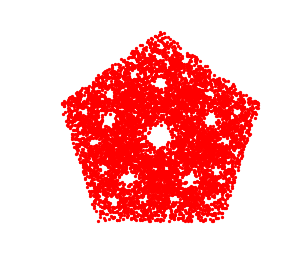

In [8]:
show(random_points(pentagon, 8000))

I definitely see a central hole, and five secondary holes surrounding that, and then, maybe 15 holes surrounding those? Or maybe not 15; hard to tell. Is a Sierpinski Pentagon a thing? I hadn't heard of it but a [quick search](https://www.google.com/search?q=sierpinski+pentagon) reveals that yes indeed, it is [a thing](http://ecademy.agnesscott.edu/~lriddle/ifs/pentagon/sierngon.htm), and it does have 15 holes surrounding the 5 holes. Let's try the hexagon:

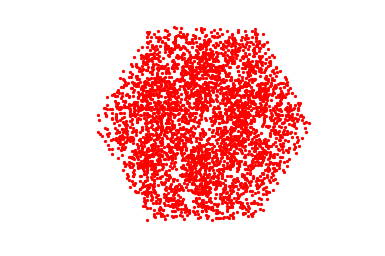

In [9]:
hexagon = ((0.5, -0.866), (1, 0), (0.5, 0.866), (-0.5, 0.866), (-1, 0), (-0.5, -0.866))

show(random_points(hexagon))

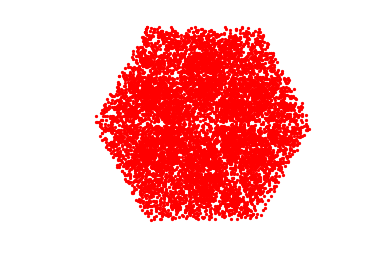

In [10]:
show(random_points(hexagon, 10000))

You can see a little of the six-fold symmetry, but it is not as clear as the triangle and pentagon.